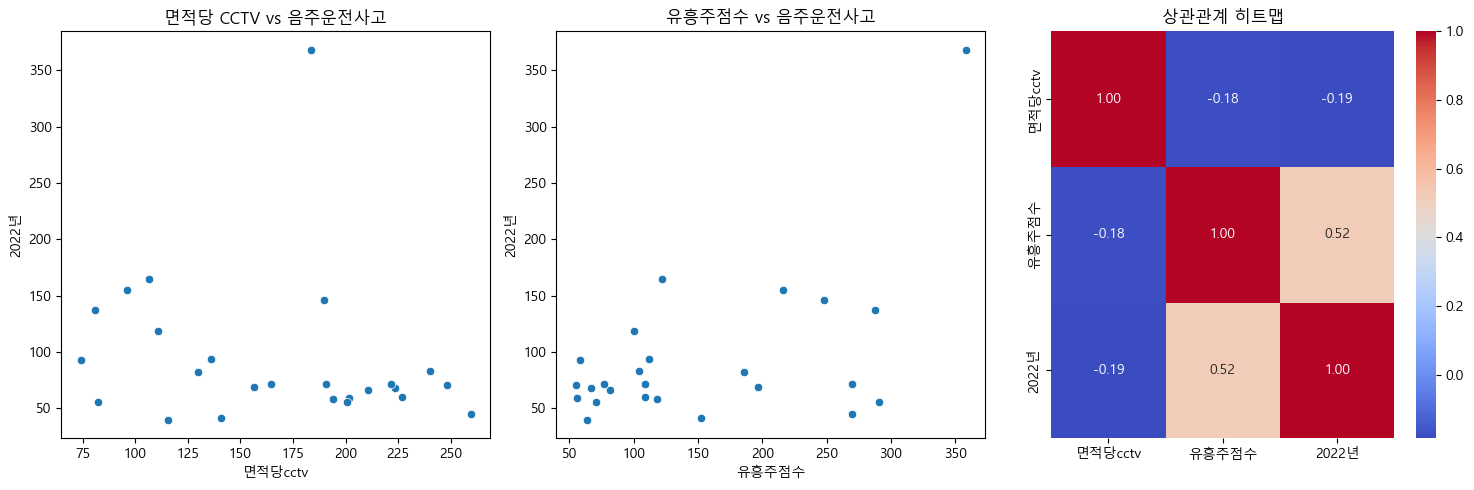

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 로드
file_path_cctv = '서울 면적cctv.csv'
file_path_club = '서울유흥주점.csv'
file_path_accident = '서울 21,22 음주운전사고현황.csv'

df_cctv = pd.read_csv(file_path_cctv, encoding='cp949')
df_club = pd.read_csv(file_path_club, encoding='cp949')  # 또는 'euc-kr' 등 사용 가능
df_accident = pd.read_csv(file_path_accident, encoding='cp949')  # 또는 'euc-kr' 등 사용 가능

# 지역구를 기준으로 데이터 병합
df_merged = pd.merge(df_cctv, df_club, on='지역구', how='inner')
df_merged = pd.merge(df_merged, df_accident, on='지역구', how='inner')

# 상관관계 분석
correlation_matrix = df_merged[['면적당cctv', '유흥주점수', '2022년']].corr()

# 산점도 및 히트맵 시각화
plt.figure(figsize=(15, 5))

# 산점도
plt.subplot(1, 3, 1)
sns.scatterplot(x='면적당cctv', y='2022년', data=df_merged)
plt.title('면적당 CCTV vs 음주운전사고')

plt.subplot(1, 3, 2)
sns.scatterplot(x='유흥주점수', y='2022년', data=df_merged)
plt.title('유흥주점수 vs 음주운전사고')

# 히트맵
plt.subplot(1, 3, 3)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('상관관계 히트맵')

plt.tight_layout()
plt.show()